In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df=pd.read_csv(r'C:\Users\afnan\Desktop\jupyetr notebook\customor_churn_cleaned.csv')

In [66]:
df.head()

,customer_id,name,age,gender,tenure,monthly_charges,total_charges,internet_service,payment_method,contract_type,churn
0,C001,Arun K,25,male,5,450.50,2252.5,fiber optic,UPI,month-to-month,Yes
1,C002,Neha S,33,female,12,590.00,7080.0,fiber optic,Credit Card,month-to-month,No
2,C003,Rahul Menon,34,male,24,670.00,16080.0,dsl,UPI,one year,Yes
3,C004,Meera T,29,female,24,550.75,13218.0,fiber optic,Debit Card,month-to-month,No
4,C005,Aswin P,46,male,60,799.00,47940.0,fiber optic,Cash,two year,Yes


In [67]:
df.shape

(68, 11)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       68 non-null     object 
 1   name              68 non-null     object 
 2   age               68 non-null     int64  
 3   gender            68 non-null     object 
 4   tenure            68 non-null     int64  
 5   monthly_charges   68 non-null     float64
 6   total_charges     68 non-null     float64
 7   internet_service  68 non-null     object 
 8   payment_method    68 non-null     object 
 9   contract_type     68 non-null     object 
 10  churn             68 non-null     object 
dtypes: float64(2), int64(2), object(7)
memory usage: 6.0+ KB


In [69]:
df.describe()

,age,tenure,monthly_charges,total_charges
count,68.000000,68.000000,68.000000,68.000000
mean,32.720588,24.323529,652.280588,17520.822353
std,7.323741,16.986774,108.900332,14851.987805
min,21.000000,3.000000,450.500000,1440.000000
25%,27.000000,11.750000,580.000000,6960.000000
50%,31.000000,21.000000,649.790000,13423.000000
75%,38.250000,30.000000,720.000000,21675.000000
max,52.000000,60.000000,890.000000,53400.000000


In [70]:
## target variable analyse

In [71]:
df['churn'].value_counts()

churn
Yes    35
No     33
Name: count, dtype: int64

In [72]:
df['churn'].value_counts(normalize=True) * 100

churn
Yes    51.470588
No     48.529412
Name: proportion, dtype: float64

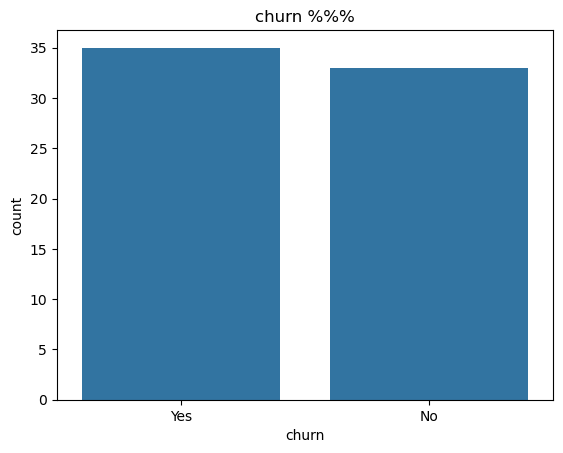

In [73]:
sns.countplot(x="churn", data=df)
plt.title("churn %%%")
plt.show()

In [74]:
colomns = df.select_dtypes(include=['int64','float64']).columns
colomns

Index(['age', 'tenure', 'monthly_charges', 'total_charges'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

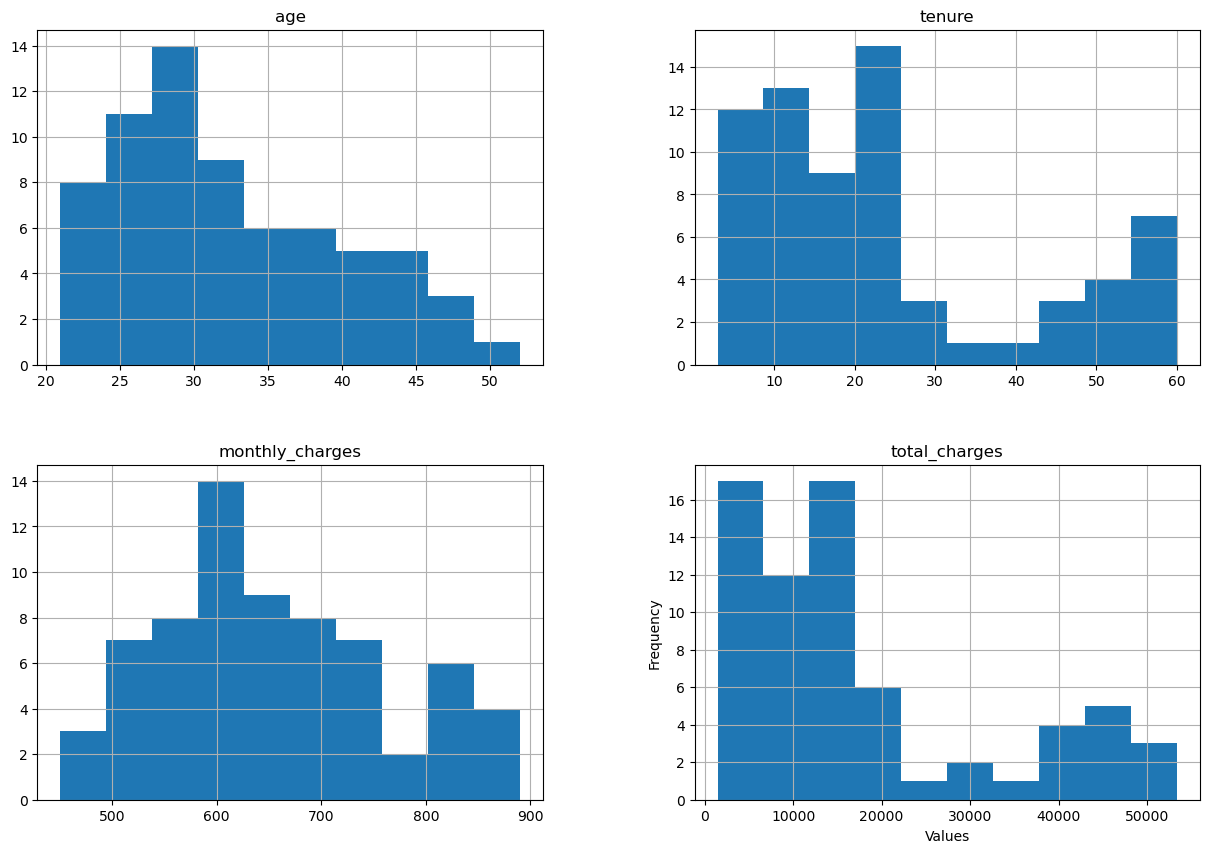

In [75]:
df[colomns].hist(figsize=(15,10))
plt.xlabel('Values')  
plt.ylabel('Frequency')
plt.show

In [76]:
catagaric_cols = df.select_dtypes(include='object').columns
catagaric_cols

Index(['customer_id', 'name', 'gender', 'internet_service', 'payment_method',
       'contract_type', 'churn'],
      dtype='object')

In [77]:
for col in catagaric_cols:
    print(df[col].value_counts())
    print('-'*30)


customer_id
C001    1
C002    1
C003    1
C004    1
C005    1
       ..
C065    1
C066    1
C067    1
C068    1
C069    1
Name: count, Length: 68, dtype: int64
------------------------------
name
Arun K         1
 Neha  S       1
Rahul Menon    1
Meera  T       1
Aswin P        1
              ..
Renjith K      1
 Athira L      1
Kishore P      1
 Arya T        1
Deepak S       1
Name: count, Length: 68, dtype: int64
------------------------------
gender
male      34
female    33
Male       1
Name: count, dtype: int64
------------------------------
internet_service
fiber optic    44
dsl            24
Name: count, dtype: int64
------------------------------
payment_method
UPI            24
Credit Card    14
Netbanking     11
Debit Card     10
Cash            9
Name: count, dtype: int64
------------------------------
contract_type
month-to-month    40
one year          16
two year          12
Name: count, dtype: int64
------------------------------
churn
Yes    35
No     33
Name: count, 

In [78]:
print(df['gender'].unique())

['male' 'female' 'Male']


In [79]:
df['gender'] = df['gender'].str.strip().str.lower()


In [80]:
for col in catagaric_cols:
    print(df[col].value_counts())
    print('-'*30)


customer_id
C001    1
C002    1
C003    1
C004    1
C005    1
       ..
C065    1
C066    1
C067    1
C068    1
C069    1
Name: count, Length: 68, dtype: int64
------------------------------
name
Arun K         1
 Neha  S       1
Rahul Menon    1
Meera  T       1
Aswin P        1
              ..
Renjith K      1
 Athira L      1
Kishore P      1
 Arya T        1
Deepak S       1
Name: count, Length: 68, dtype: int64
------------------------------
gender
male      35
female    33
Name: count, dtype: int64
------------------------------
internet_service
fiber optic    44
dsl            24
Name: count, dtype: int64
------------------------------
payment_method
UPI            24
Credit Card    14
Netbanking     11
Debit Card     10
Cash            9
Name: count, dtype: int64
------------------------------
contract_type
month-to-month    40
one year          16
two year          12
Name: count, dtype: int64
------------------------------
churn
Yes    35
No     33
Name: count, dtype: int64


In [81]:
pd.crosstab(df['contract_type'], df['churn'], normalize='index') * 100   # relation undakkunnu


churn,No,Yes
contract_type,,
month-to-month,62.500000,37.500000
one year,43.750000,56.250000
two year,8.333333,91.666667


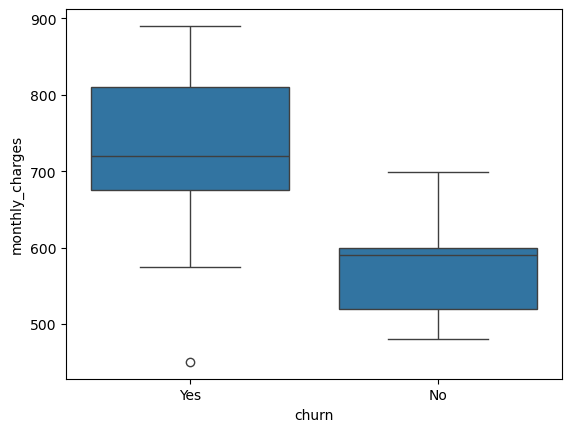

In [82]:
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.show()   # 700 to 800 monthly charge ullavar koodutgalum company vittu poyi (high churn,low churn)

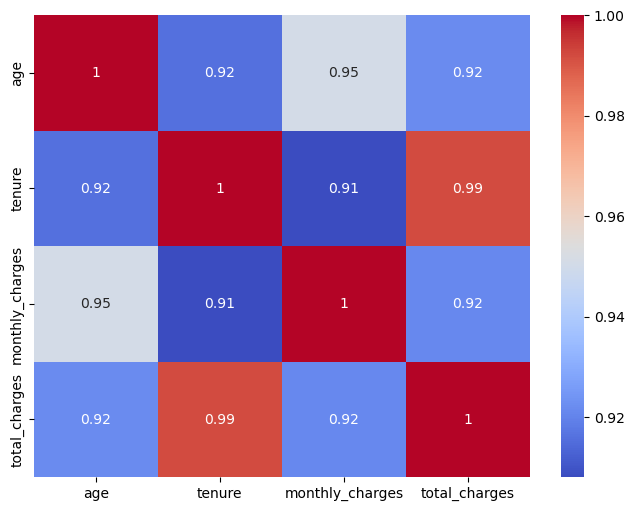

In [83]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

In [84]:
plt.show()

In [85]:
## out liear

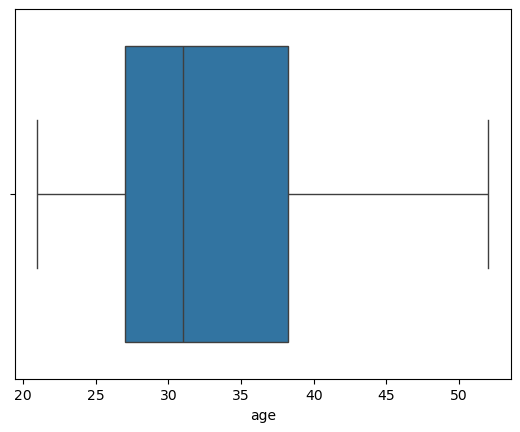

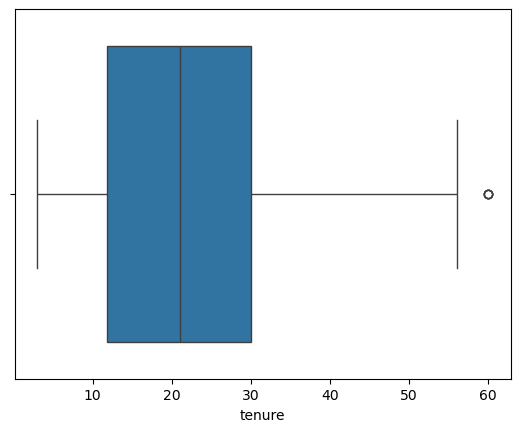

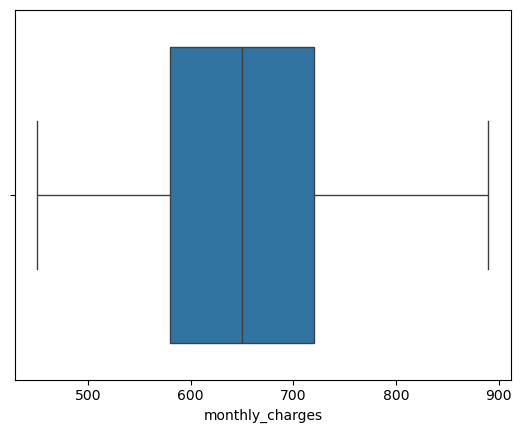

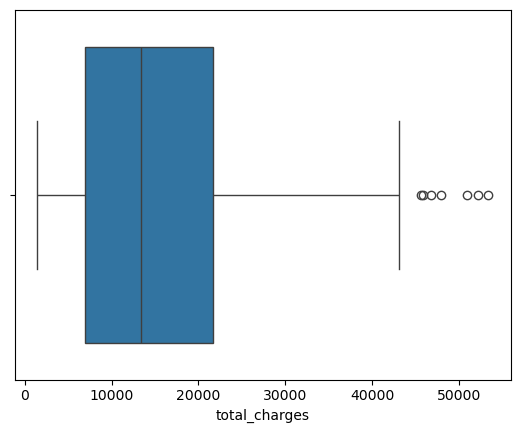

In [91]:
for col in num_cols:
    sns.boxplot(x=df[col])
    plt.show()

In [92]:
## customor segment

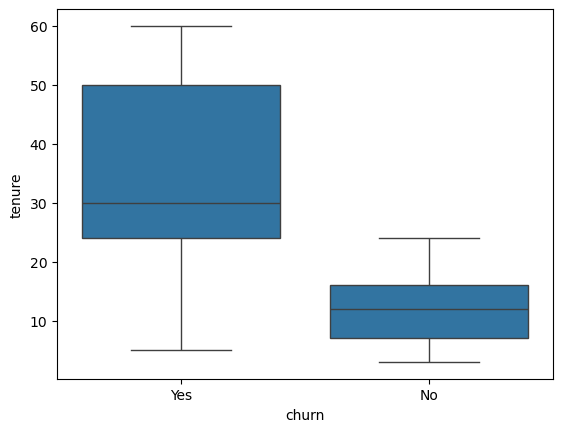

In [93]:
sns.boxplot(x='churn', y='tenure', data=df)
plt.show()


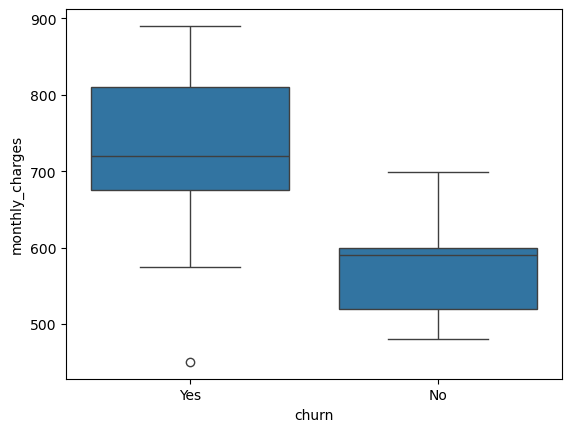

In [94]:
sns.boxplot(x='churn', y='monthly_charges', data=df)
plt.show()

In [97]:
df['tenure_group'] = pd.cut(
    df['tenure'],
    bins=[0, 12, 48, df['tenure'].max()],
    labels=['Short', 'Medium', 'Long']
)
pd.crosstab(df['tenure_group'], df['churn'], normalize='index') * 100

churn,No,Yes
tenure_group,,
Short,90.476190,9.523810
Medium,38.888889,61.111111
Long,0.000000,100.000000


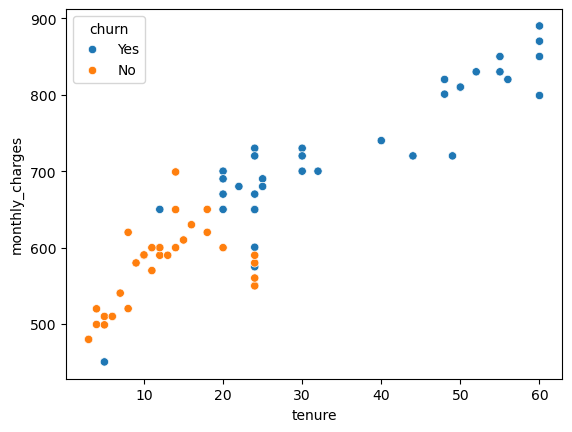

In [98]:
sns.scatterplot(
    x='tenure',
    y='monthly_charges',
    hue='churn',
    data=df
)
plt.show()


## Customer Segmentation 

Short tenure + high charges → High churn risk customers

Short tenure + low charges → New customers

Long tenure + high charges → Loyal premium customers

Long tenure + low charges → Stable customers

In [100]:
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       68 non-null     object  
 1   name              68 non-null     object  
 2   age               68 non-null     int64   
 3   gender            68 non-null     object  
 4   tenure            68 non-null     int64   
 5   monthly_charges   68 non-null     float64 
 6   total_charges     68 non-null     float64 
 7   internet_service  68 non-null     object  
 8   payment_method    68 non-null     object  
 9   contract_type     68 non-null     object  
 10  churn             68 non-null     object  
 11  tenure_group      68 non-null     category
dtypes: category(1), float64(2), int64(2), object(7)
memory usage: 6.2+ KB


customer_id         0
name                0
age                 0
gender              0
tenure              0
monthly_charges     0
total_charges       0
internet_service    0
payment_method      0
contract_type       0
churn               0
tenure_group        0
dtype: int64

In [101]:
df['churn'].value_counts()
df['churn'].value_counts(normalize=True)*100


churn
Yes    51.470588
No     48.529412
Name: proportion, dtype: float64